In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
from panel_utilities import get_value_variable_names, prepare_df_for_DiD
from stats_utilities import select_controls, test_balance, produce_summary_statistics
from figure_utilities import aggregate_by_event_time_and_plot, aggregate_by_time_and_plot
import pandas as pd



# Store paths.
analysis='group_0_crimes_500m'
INPUT_DATA = "../../data/03_cleaned/crime_analysis_monthly.parquet"
OUTPUT_FIGURES = f"../../output/{analysis}/figures"
OUTPUT_TABLES = f"../../output/{analysis}/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_parquet(INPUT_DATA)

In [2]:
# Convert weekly panel to biweekly panel.
treatment_date_variable = 'latest_docket_month'
df = df.dropna(subset=treatment_date_variable)

# Generate value vars list and month to int dictionaries.
weekly_value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = get_value_variable_names(df, analysis)

In [3]:
pre_pandemic_months = ['2019-04'
                       '2019-05'
                       '2019-06',
                       '2019-07',
                       '2019-08',
                       '2019-09',
                       '2019-10',
                       '2019-11',
                       '2019-12',
                       '2020-01',
                       '2020-02',
                       '2020-03']

df = df.loc[df['latest_docket_month'].isin(pre_pandemic_months), :]

In [4]:
covariates_exploration_df = select_controls(df=df, analysis=analysis,
                                            treatment_date_variable=treatment_date_variable,
                                            output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                                                  
                                                 \emph{Independent Variable}                                      
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_0_crimes_500m        0.000000e+00   
                                                 pre_treatment_change_in_group_0_crimes_500m       4.977729e-37   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                9.193322e-02   
                                                 job_density_2013                                  2.149422e-56   
                                                 med_hhinc2016                                     6.807501e-01   
                                                 poor_share2010                                    5.092376e-18   
                                                 popdensity2010                                    2.773241e-21   
Panel C: Case Initiation                         for_cause                                         4.061688e-01   
                                                 no_cause                                          9.470540e-03   
                                                 non_payment                                       6.270025e-08   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                          3.918374e-02   
                                                 hasAttyP                                          6.302424e-01   
                                                 isEntityD                                         3.632419e-06   
                                                 isEntityP                                         3.287237e-02   

                                                                                                            
                                                                                                            
                                                 \emph{Independent Variable}                                
Panel A: Pre-treatment Outcomes                  total_twenty_seventeen_group_0_crimes_500m   5.356471e-01  
                                                 pre_treatment_change_in_group_0_crimes_500m  4.024867e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                           6.459445e-01  
                                                 job_density_2013                             9.665927e-01  
                                                 med_hhinc2016                                6.659248e-02  
                                                 poor_share2010                               1.324771e-02  
                                                 popdensity2010                               6.521638e-01  
Panel C: Case Initiation                         for_cause                                    5.128226e-03  
                                                 no_cause                                     1.665553e-02  
                                                 non_payment                                  1.203443e-05  
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                     2.952041e-09  
                                                 hasAttyP                                     6.865308e-04  
                                                 isEntityD                                    8.872391e-02  
                                                 isEntityP                                    7.689860e-05

In [5]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                             Cases Won by Plaintiff   
Panel A Total Crime Incidents, 2017                     1156.472252   
        Change in Crime Incidents, 2017-2019            -155.015234   
Panel B Job density, 2013                              16601.055923   
        Poverty rate, 2010                                 0.281722   
        Population density, 2010                       23444.386532   
Panel C Filing without cause                               0.033732   
        Filing for nonpayment                              0.730141   
Panel D Defendant has attorney                             0.010881   
        Defendant is entity                                0.018498   
        Plaintiff is entity                                0.811752   

                                             Difference in Cases Won by Defendant  \
                                                                       Unweighted   
Panel A Total Crime Incidents, 2017                                    -22.772548   
        Change in Crime Incidents, 2017-2019                            -9.412034   
Panel B Job density, 2013                                              -94.191878   
        Poverty rate, 2010                                              -0.019659   
        Population density, 2010                                      -337.749606   
Panel C Filing without cause                                            -0.025468   
        Filing for nonpayment                                           -0.095459   
Panel D Defendant has attorney                                          -0.054719   
        Defendant is entity                                             -0.013502   
        Plaintiff is entity                                             -0.074648   

                                                                         \
                                                  \emph{p}     Weighted   
Panel A Total Crime Incidents, 2017           5.356471e-01  -113.837414   
        Change in Crime Incidents, 2017-2019  4.024867e-01    11.760719   
Panel B Job density, 2013                     9.665927e-01 -1568.815981   
        Poverty rate, 2010                    1.324771e-02    -0.031692   
        Population density, 2010              6.521638e-01 -2272.975666   
Panel C Filing without cause                  1.665553e-02    -0.010282   
        Filing for nonpayment                 1.203443e-05    -0.094627   
Panel D Defendant has attorney                2.952041e-09    -0.016368   
        Defendant is entity                   8.872391e-02    -0.005508   
        Plaintiff is entity                   7.689860e-05    -0.096369   

                                                            
                                                  \emph{p}  
Panel A Total Crime Incidents, 2017           5.951804e-04  
        Change in Crime Incidents, 2017-2019  2.698440e-01  
Panel B Job density, 2013                     4.866340e-01  
        Poverty rate, 2010                    3.978927e-05  
        Population density, 2010              6.670823e-04  
Panel C Filing without cause                  3.210155e-01  
        Filing for nonpayment                 1.733822e-05  
Panel D Defendant has attorney                6.021013e-03  
        Defendant is entity                   4.840195e-01  
        Plaintiff is entity                   2.450380e-07

In [6]:
# Generate indicators for missing data.

# missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = df.reset_index()
df = prepare_df_for_DiD(df=df,
                        analysis=analysis,
                        treatment_date_variable=treatment_date_variable,
                        pre_treatment_covariates=pre_treatment_covariates,
                        missing_indicators=[],
                        value_vars=weekly_value_vars_crime,
                        period_to_int_dictionary=month_to_int_dictionary)

In [7]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='2W', base_period='universal')
result = att_gt.fit(formula=analysis, control_group='not_yet_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 828/828 [00:17<00:00, 47.25it/s] 


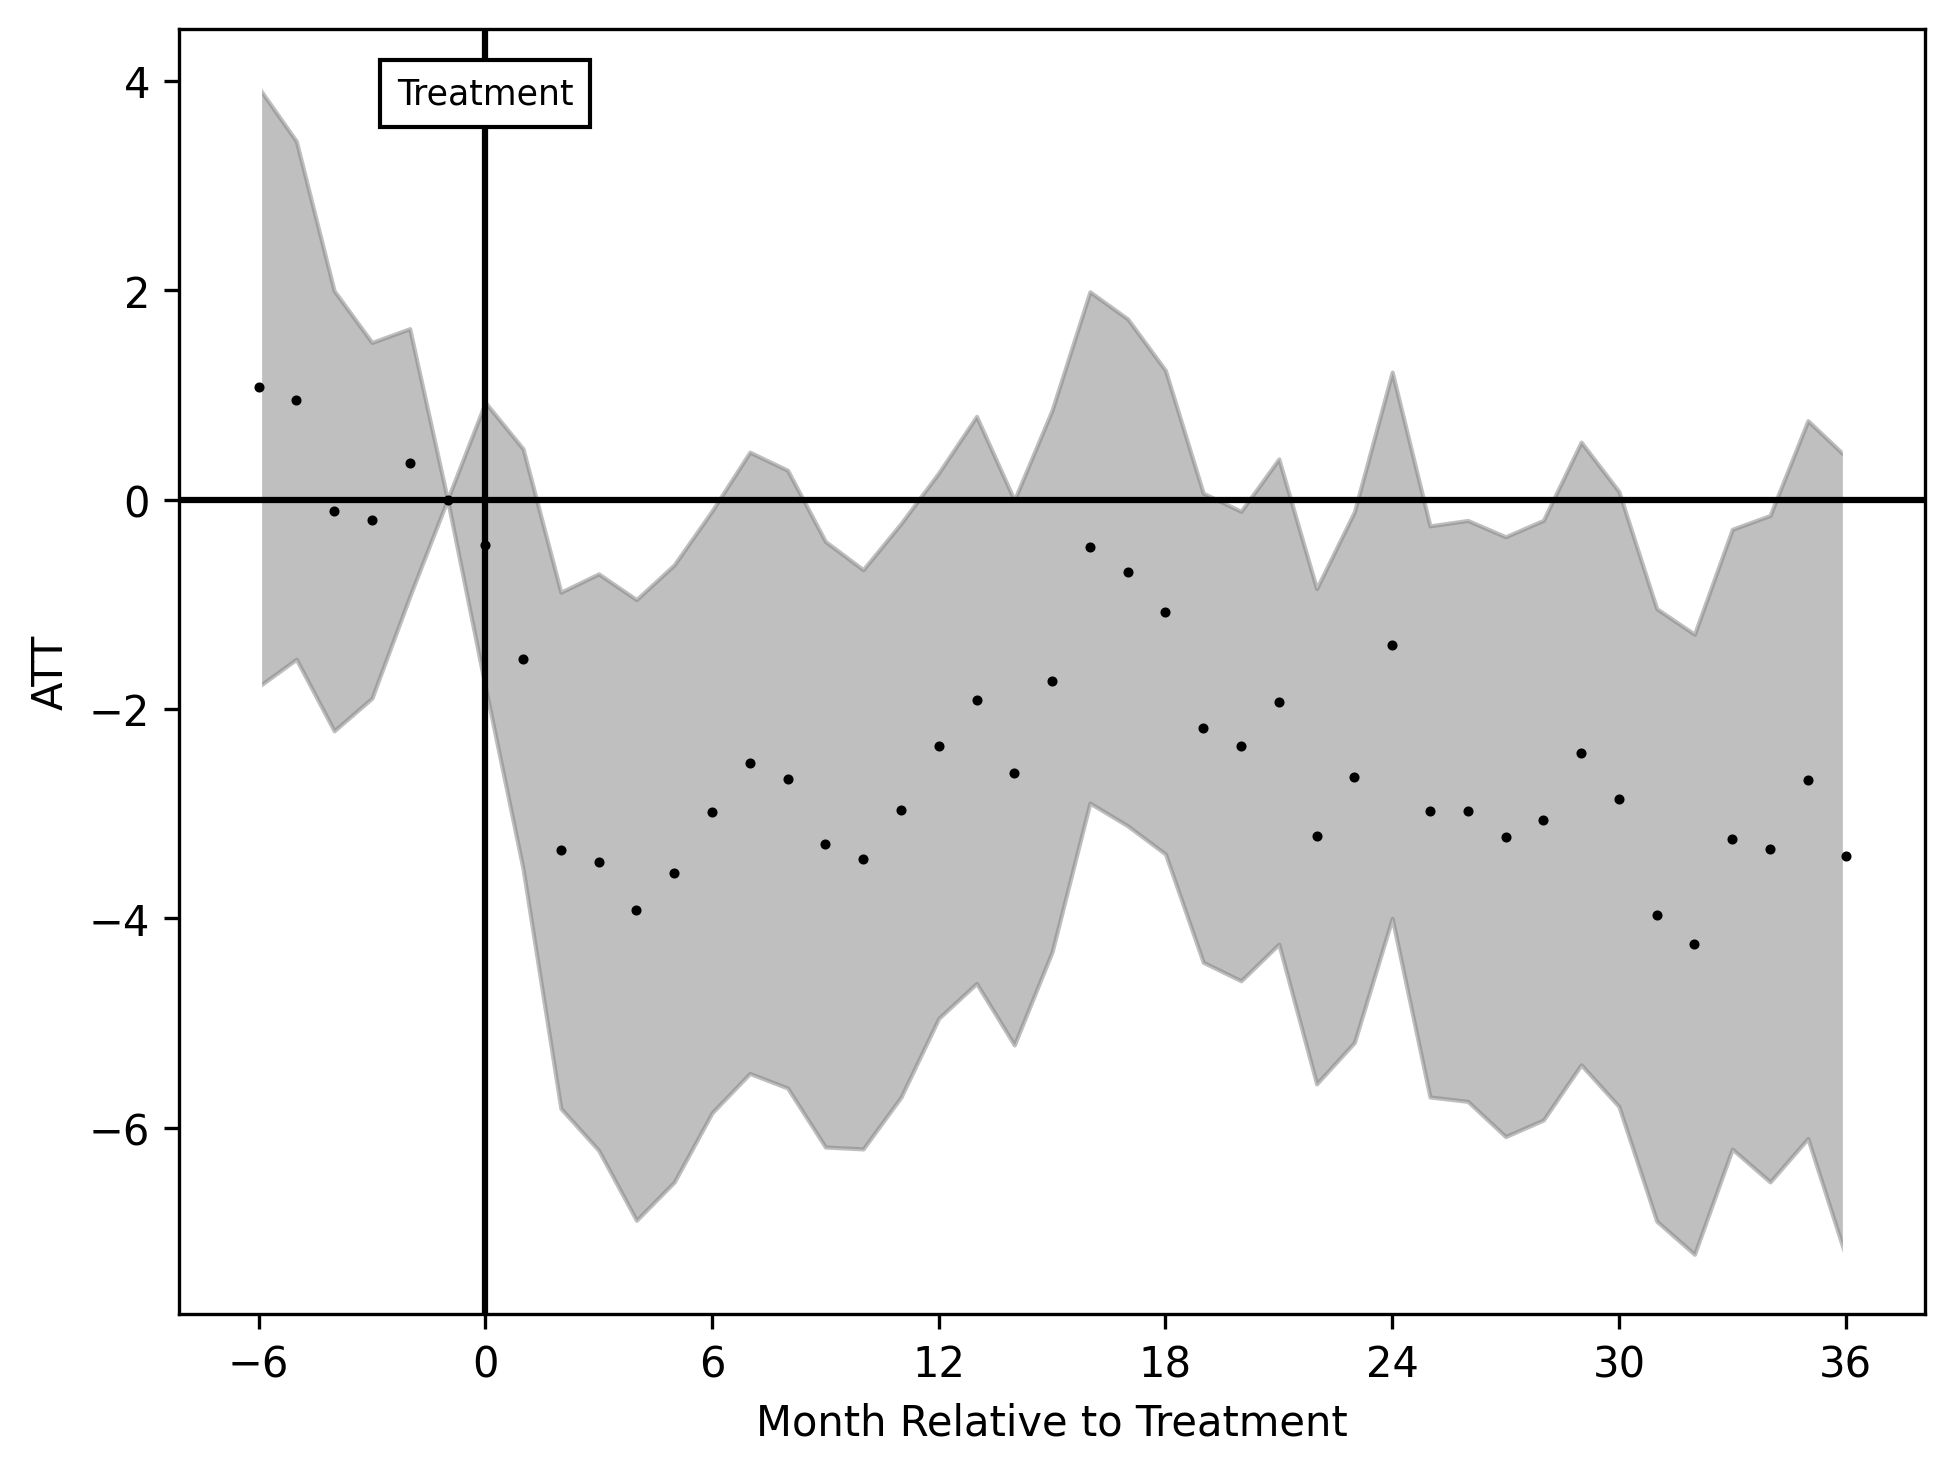

In [8]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-6, end_period=36,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

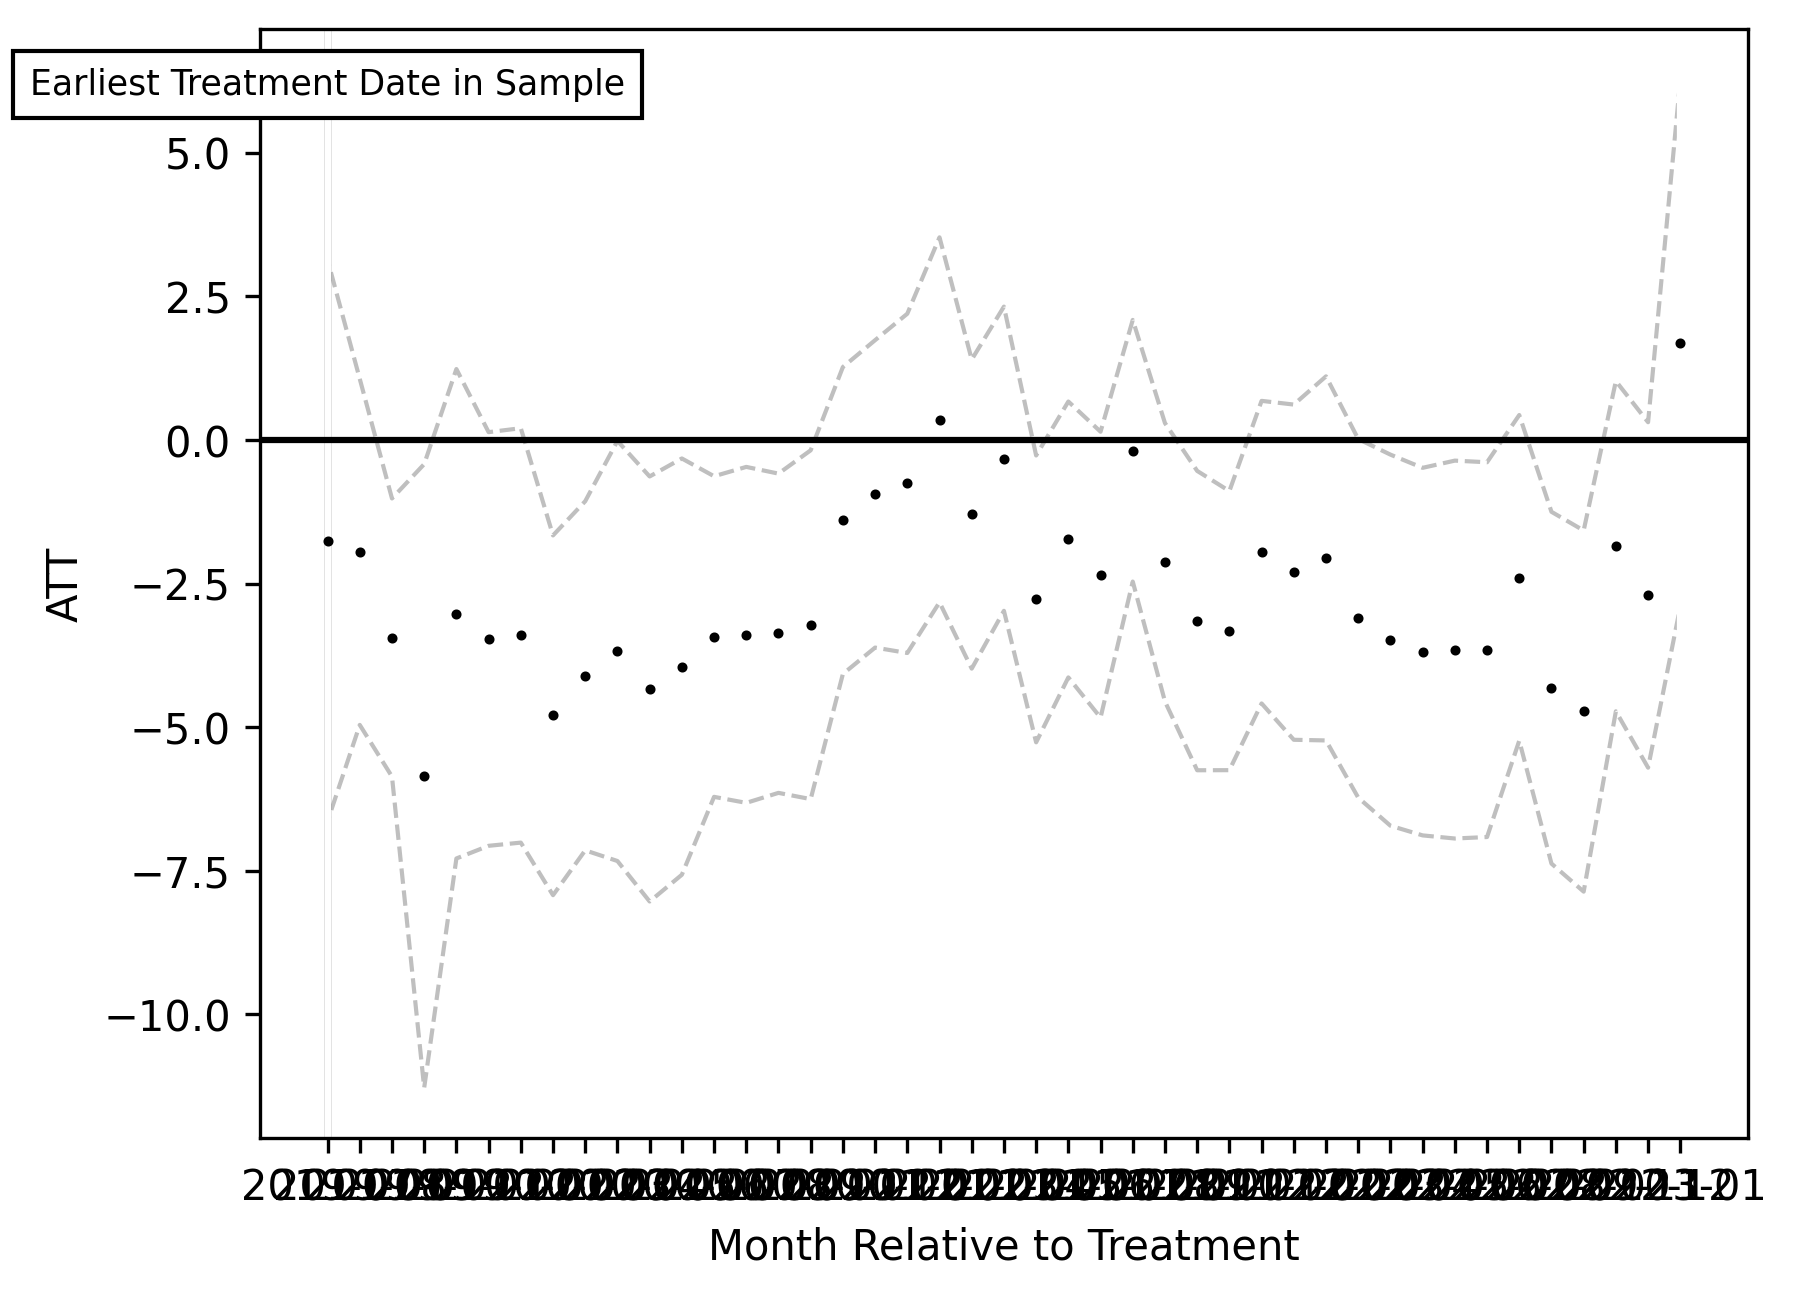

In [9]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="")

In [10]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_date_variable, freq='M', base_period='universal')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='not_yet_treated', n_jobs=-1, progress_bar=True)

Computing ATTgt [workers=10]  100%|████████████████████| 828/828 [00:47<00:00, 17.38it/s] 


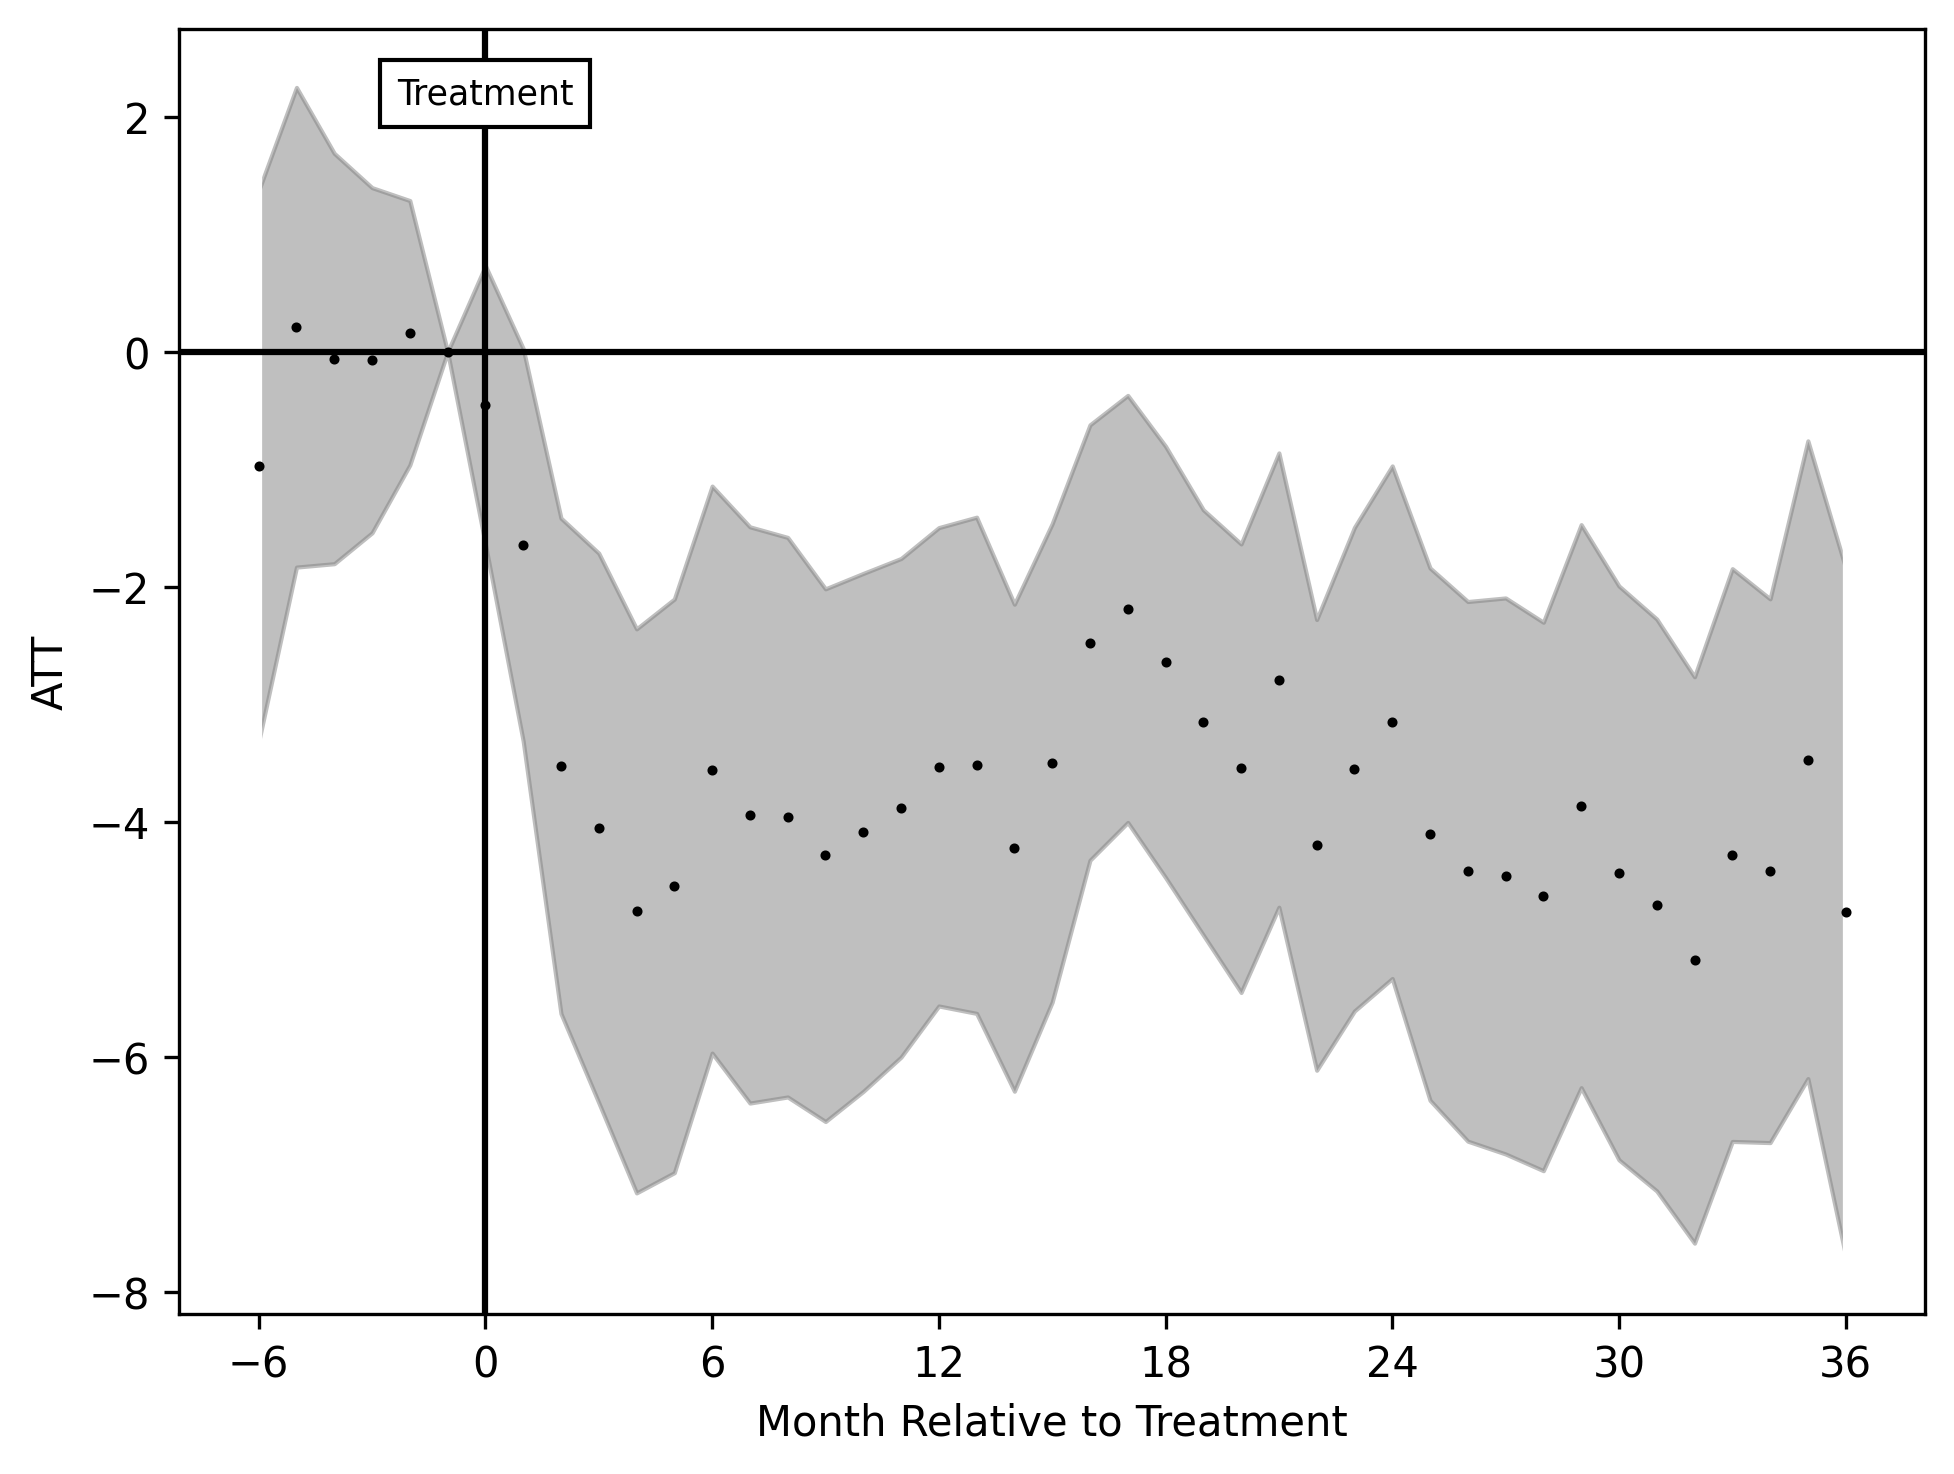

In [11]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-6,
                                 end_period=36,
                                 title="",
                                 treatment_month_variable=treatment_date_variable, df=df)

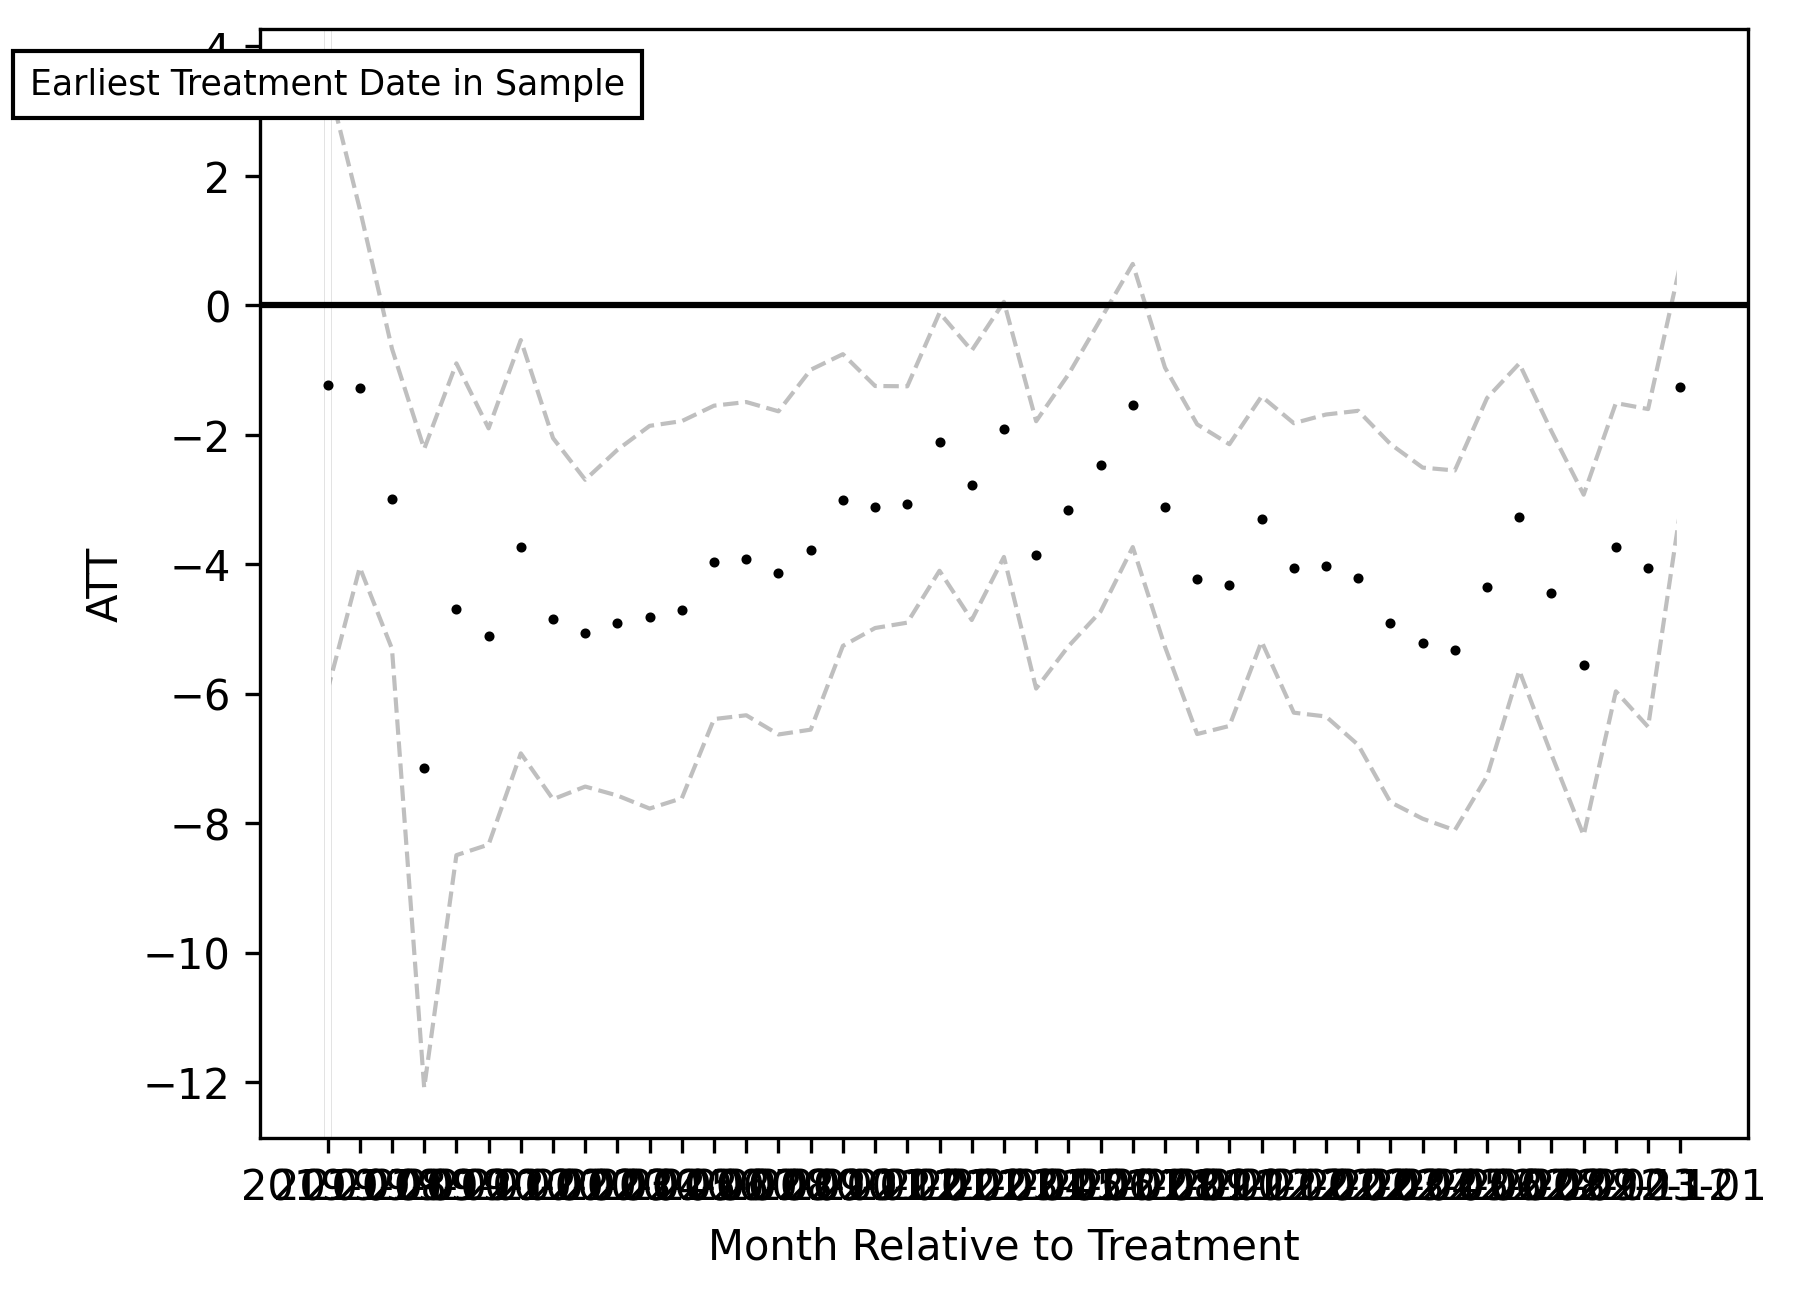

In [12]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="")